In [210]:
#define inputs here


control = [[],[]] #array of people in control for each one we will examine
treatment = [[],[]] #array of people in treatement for each one we will examine
#NOTE - redefined to be 1D arrays - rn I think just running on one sample

import pandas as pd
#load dataset
with open("../Groups.csv", 'r') as f:
    df = pd.read_csv(f)
# df.head()
control = df["control_group"].to_list()
treatment = df["treatment_group"].to_list()

#i know there's some duplicates but let's make sure there's some overlap
for c in control:
    assert(not c in treatment)

In [211]:
# !pip install empath

In [212]:
#define input text model (as will be analyzed) here
from empath import Empath

global lexicon

lexicon = Empath()

#negative
lexicon.create_category("angry", ["angry"], model="nytimes")
lexicon.create_category("lonely", ["lonely"], model="nytimes")
lexicon.create_category("sad", ["sad"], model="nytimes")
lexicon.create_category("worried", ["worried"], model="nytimes")
lexicon.create_category("frustrated", ["frustrated"], model="nytimes")
lexicon.create_category("anxious", ["anxious"], model="nytimes")
lexicon.create_category("nervous", ["nervous"], model="nytimes")
lexicon.create_category("disappointed", ["disappointed"], model="nytimes")
lexicon.create_category("gloomy", ["gloomy"], model="nytimes")
lexicon.create_category("miserable", ["miserable"], model="nytimes")
lexicon.create_category("lonely", ["lonely"], model="nytimes")

#positive
lexicon.create_category("happy", ["happy"], model="nytimes")
lexicon.create_category("loved", ["loved"], model="nytimes")
lexicon.create_category("joyful", ["joyful"], model="nytimes")
lexicon.create_category("content", ["content"], model="nytimes")
lexicon.create_category("pleased", ["pleased"], model="nytimes")
lexicon.create_category("grateful", ["grateful"], model="nytimes")
lexicon.create_category("relieved", ["relieved"], model="nytimes")
lexicon.create_category("optimistic", ["optimistic"], model="nytimes")
lexicon.create_category("satisfied", ["satisfied"], model="nytimes")
lexicon.create_category("excited", ["excited"], model="nytimes")
lexicon.create_category("loved", ["loved"], model="nytimes")





["angry", "furious", "frustrated", "frightened", "disgusted", "outraged", "upset", "irritated", "resentful", "annoyed", "embarrassed", "unhappy", "exasperated", "incensed", "indignant", "fearful", "distressed", "scared", "terrified", "enraged", "confused", "afraid", "anxious", "irate", "insulted", "agitated", "distraught", "nervous", "bitter", "bewildered", "impatient", "offended", "shocked", "disgusted", "humiliated", "ashamed", "apprehensive", "puzzled", "incredulous", "perplexed", "tired", "worried", "disgruntled", "mystified", "dispirited", "despondent", "sad", "aghast", "alarmed", "exasperated", "mad", "terrified", "dismayed", "aggrieved", "irritated", "uneasy", "apologetic", "pained", "angered", "uncomfortable", "annoyed", "frightened", "bewildered", "horrified", "dissatisfied", "sorry", "appalled", "disappointed", "insecure", "defiant", "jealous", "relieved", "shocked", "bullied", "abusive", "intimidated", "disturbed", "suspicious", "complaining", "embittered", "elated", "angrie

In [213]:
def get_data_from_txt(txt:str):
    global lexicon

    unnormalized = lexicon.analyze(txt, categories=["angry","sad","worried",
       "frustrated","anxious",
        "nervous","disappointed",
      "gloomy","miserable","longly",
       "happy", "loved", "joyful",
        "content", "pleased",
      "grateful", "relieved",
      "optimistic", "satisfied",
        "excited"],normalize = False)
  
    normalized = lexicon.analyze(txt, categories=["angry","sad","worried",
       "frustrated","anxious",
        "nervous","disappointed",
      "gloomy","miserable","longly",
       "happy", "loved", "joyful",
        "content", "pleased",
      "grateful", "relieved",
      "optimistic", "satisfied",
        "excited"],normalize = True)
    

    #we want to make these average to 0 
    summed = 0
    for v in normalized.values(): summed += v 
    to_add = -summed/len(normalized)

    for k in normalized.keys():
        normalized[k] += to_add
    
    return normalized
    
    # assert False, "use the lexicon Jiayi uses for results - note this is current but idk there is way to get past one"

In [214]:
get_data_from_txt("I want to die")

{'angry': -0.0125,
 'sad': -0.0125,
 'worried': -0.0125,
 'frustrated': -0.0125,
 'anxious': -0.0125,
 'nervous': -0.0125,
 'disappointed': -0.0125,
 'gloomy': -0.0125,
 'miserable': -0.0125,
 'longly': -0.0125,
 'happy': 0.2375,
 'loved': -0.0125,
 'joyful': -0.0125,
 'content': -0.0125,
 'pleased': -0.0125,
 'grateful': -0.0125,
 'relieved': -0.0125,
 'optimistic': -0.0125,
 'satisfied': -0.0125,
 'excited': -0.0125}

In [215]:
from typing import List, Dict, Tuple

In [216]:
# !pip install praw

In [217]:
import praw  #Python Reddit API Wrappe

In [218]:
reddit = praw.Reddit(
    client_id="54u8-WeUDusPlUoFQDZu4w",
    client_secret="lGhkiE6scCkSMYsj0P9AXzyYVSLBag",
    user_agent="jellyfish"
)

In [266]:
# user = reddit.redditor('Sariel007')
#https://praw.readthedocs.io/en/stable/code_overview/reddit/user.html#praw.models.User

this_redditor = reddit.redditor('Sariel007')
for comment in this_redditor.comments.top():
    # print("\n".join(dir(comment)))
    print(comment.subreddit_id)
    break

t5_2qnts


In [220]:
from datetime import datetime

In [221]:
#class to map a string based Enum to an integer, enable backtrace
class Enum:

    #class variable to map enum names to potential enu
    find_name = dict()
    def __init__(self, name):
        assert(not name in Enum.find_name)
        Enum.find_name[name] = self
        self.names = dict()
        self.int_to_name = dict() #array would be more efficieny
    
    #map the name to a number
    def get_val(self, enum):
        if (not enum in self.names):
            self.int_to_name[len(self.names)+1] = enum
            self.names[enum] = len(self.names) + 1
        return self.names[enum]
    
    #get the number of enums in this class
    def get_num_enums(self):
        return len(self.names)

    def get_enum(name):
        return Enum.find_name[name] if name in Enum.find_name else Enum(name)
    
    def is_enum(name):
        return name in Enum.find_name
    

In [222]:

def process_comments(redditor:praw.models.Redditor) -> List[Tuple[datetime.date, Dict]]:
    comment_arr = list()
    for comment in redditor.comments.top():
        date = datetime.fromtimestamp(comment.created_utc)
        val_here = {
            "is_edited": comment.edited,
            # "link_title": comment.link_title, 
            "num_replies": len(comment.replies.list()),
            "score": comment.score, 
            "score_is_hidden": comment.score_hidden,
            "total_awards": comment.total_awards_received, 
            "num_ups": comment.ups, 
            "num_downs": comment.downs, 
            # "body": comment.body,
            # "date": comment.created_utc,
            "is_submitter": comment.is_submitter, 
            "stickied": comment.stickied
        }
        for name, txt_data in [("title", comment.link_title), ("body", comment.body)]:
            emotion_dict = get_data_from_txt(txt_data)
            for emotion_name, emotion_val in emotion_dict.items():
                val_here[name + "_" + emotion_name] = emotion_val
        # assert False, "need to analyze body + title using emotions"
        comment_arr.append((date, val_here))
    comment_arr.sort()
    return comment_arr
        
def get_base_data_redditor(redditor: praw.models.Redditor):
    to_ret = dict()
    to_ret["comment_karma"] = redditor.comment_karma
    to_ret["time_creation"] = redditor.created_utc
    to_ret["verified_email"] = redditor.has_verified_email
    to_ret["is_employee"] = redditor.is_employee
    to_ret["is_mod"] = redditor.is_mod
    to_ret["is_gold"] = redditor.is_gold 
    to_ret["link_karma"] = redditor.link_karma
    to_ret["num_moderated"] = len(redditor.moderated()) # TODO - analyze
    to_ret["num_multireddits"] = len(redditor.multireddits()) #TODO - analyze
    to_ret["num_trophies"] = len(redditor.trophies()) # TODO - analyze the kind a trophies
    
    
    if (redditor.subreddit):
        to_ret["has_subreddit"] = True
        to_ret["over_18"] = redditor.subreddit.over_18#redditor.subreddit["over_18"]
        to_ret["num_subscribers"] = redditor.subreddit.subscribers#redditor.subreddit["subscribers"]
        #analyze public description
        #analyze title
    else:
        to_ret["has_subreddit"] = False

    

    return to_ret
def get_base_data(user_name: str):
    print("base data for ", user_name)
    try:
        this_redditor = reddit.redditor(user_name)
        print("returning")
        to_ret = {"user_comment_data": process_comments(this_redditor), "valid": True}
        to_ret.update({"base_data": get_base_data_redditor(this_redditor)})
        return to_ret
    except Exception as E:
        print("Exception is ", E)
        return {"valid": False}



In [223]:
treatment

['MoosieGoose',
 'JollyK9',
 'Southern_Ad3032',
 'bduwowy272habbw',
 'Late_Introduction203',
 'kapster68',
 'TheApertureMonkey',
 'talemoon22',
 'sebagolindenwald',
 'spicyranchplzz',
 'TheFloorMayBeLava_02',
 'rxtten_flesh',
 'greenblooded395',
 'greenblooded395',
 'DrakenJosh98',
 'WhichUsernameIsBest',
 'FStahp2',
 'Pongpianskul',
 'Kanashimi515',
 'eviuwu',
 'Kattheloner_22',
 'Reeze2911',
 'Sac20000',
 'RanpoWasTaken',
 'jlynny1811',
 'Playful-Fail4778',
 'GarageOk8109',
 'katandcats',
 'holyredemption',
 'jifpeanutbutter420',
 'Timely_Inflation1000',
 'Erica_Peanut']

In [224]:
from concurrent.futures import ThreadPoolExecutor

def get_base_data_parallel(c):
    return c, get_base_data(c)

with ThreadPoolExecutor() as executor:
    control_dataset = dict(executor.map(get_base_data_parallel, [c for c in control if isinstance(c, type(""))]))

with ThreadPoolExecutor() as executor:
    treatment_dataset = dict(executor.map(get_base_data_parallel, [t for t in treatment if isinstance(t, type(""))]))
    
# control_dataset = {c: get_base_data(c) for c in control if isinstance(c, type(""))}
# treatment_dataset = {t: get_base_data(t) for t in treatment if isinstance(t, type(""))}

base data for  esearcher
returning
base data for  Zarrigo
returning
base data for  damepipi
returning
base data for  -stayHard-
returning
base data for  BIueBaru
returning
base data for  BIueBaru
returning
base data for  FlaviaVerda21
returning
base data for  BabiNurse90
returning
base data for  Hopeful_Product_57
returning
base data for  BIueBaru
returning
base data for  Heronesque
returning
base data for  New-Scallion252
returning


base data for  Gin-and-turtles
returning
base data for  Gin-and-turtles
returning
base data for  androidbear04
returning
base data for  BIueBaru
returning
base data for  ultrachangon
returning
base data for  Sew-Fresh
returning
base data for  HelloSillyKitty
returning
base data for  ChrisBreederveld
returning
base data for  Busy-Economics-7938
returning
base data for  BIueBaru
returning
base data for  BIueBaru
returning
base data for  BIueBaru
returning
base data for  Both_Kaleidoscope564
returning
base data for  hungrycaterpillarpop
returning
base data for  rumporkchop
returning
base data for  Thrill_Monster
returning
base data for  InvisibleSaiki
returning
base data for  AutoModerator
returning
base data for  AutoModerator
returning
base data for  Perkoka
returning
base data for  MoosieGoose
returning
base data for  JollyK9
returning
base data for  Southern_Ad3032
returning
base data for  bduwowy272habbw
returning
base data for  Late_Introduction203
returning
base data for  kapster68

In [225]:
print(treatment_dataset["MoosieGoose"]["user_comment_data"][0][0])
random_user = get_base_data("sage_x3")
print(random_user["user_comment_data"][0][0])

2019-07-16 10:48:48
base data for  sage_x3
returning
2012-07-29 10:49:29


Notes to self
should have two datasets - an extended dataset (i.e. once we get a lot of data we can use)
a base stats - those stats I would think are essential for use on a more limitted dataset

In [226]:
#get dataset for both these guys
# control_dataset = {c: get_base_data(c) for c in control}
# treatment_dataset = {t: get_base_data(t) for t in treatment}

In [227]:
#statistics
import scipy
SIGNIFICANCE = .05
def get_stats_continuous(dist1: List[int|float], dist2: List[int|float]) -> Tuple[bool, float]:
    """returns whether or not they are from the same distribution"""

    max_both = max(dist1+ dist2)
    min_both = min(dist1+dist2) 
    epsilon = 1/100000000
    dist1 = [(v-min_both)/(max_both-min_both+epsilon) for v in dist1]
    dist2 = [(v-min_both)/(max_both-min_both+epsilon) for v in dist2]

    #continuous how likely would I see dist1 | dist2 (+ vice versa, takes min)
    stats_results = scipy.stats.kstest(dist1, dist2)
    print("p is ",stats_results.pvalue )
    return stats_results.pvalue > SIGNIFICANCE, stats_results.pvalue

def get_stats_categorical(dist1: List[int|bool], dist2: List[int|bool]) -> Tuple[bool, float]: 
    #create dict for chi squared
    val_to_idx = dict()
    keys1 = dict()
    keys2 = dict()

    for v in dist1:
        keys1[v] = keys1.get(v,0) + 1
        # all_keys[v] = all_keys.get(v,0)+1
        if (not v in val_to_idx):
            val_to_idx[v] = len(val_to_idx)
    
    for v in dist2:
        keys2[v] = keys2.get(v,0)  + 1
        # all_keys[v] = all_keys.get(v,0)+1
        if (not v in val_to_idx):
            val_to_idx[v] = len(val_to_idx)

    #create arrays for frequencies
    freq1 = [0] * len(val_to_idx)
    freq2 = [0] * len(val_to_idx)

    #set both for distribution
    for val, num in keys1.items():
        freq1[val_to_idx[val]] = num 
    
    for val, num in keys2.items():
        freq2[val_to_idx[val]] = num 
    
    #construct a contingency table from this data
    contingency_table = [freq1, freq2]

    result = scipy.stats.chi2_contingency(contingency_table)
    print("p is ", result.pvalue)
    return result.pvalue > SIGNIFICANCE, result.pvalue
    #chi2_contingency
    #contingency table has rows of teh values (in this case 2 by NUM CATEGORIES)
    


In [228]:
#test it stupidly real quick
from random import randint
print(get_stats_continuous([randint(1,4)/1000 for i in range(100)], [randint(-1,10)/1000 for i in range(80)]))
print(get_stats_categorical([randint(1,2) == 1 for i in range(100)], [randint(-1,3)==2 for i in range(85)]))
print(get_stats_categorical([randint(1,5) for i in range(100)], [randint(1,5) for i in range(80)]))

p is  4.29709296684027e-10
(False, 4.29709296684027e-10)
p is  0.010999344250867443
(False, 0.010999344250867443)
p is  0.6409781593078346
(True, 0.6409781593078346)


In [229]:
#same -> lower
#The closer this number is to 0 the more likely it is that the two samples were drawn from the same distribution
# You reject the null hypothesis that the two samples were drawn from the same distribution if the p-value is less than your significance level
####fail to reject if greater than significance level (p=0.5)
scipy.stats.kstest([1,2,3,4,1,2,3], [1,2,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,11,1])

KstestResult(statistic=0.5642857142857143, pvalue=0.04337916511829555, statistic_location=1, statistic_sign=-1)

In [230]:
#only get ppl we could get data for 
print(len(control_dataset))
print(len(treatment_dataset))
control_dataset = {k: v for k, v in control_dataset.items() if v["valid"]}
treatment_dataset = {k: v for k, v in treatment_dataset.items() if v["valid"]}

print(len(control_dataset))
print(len(treatment_dataset))

24
31
24
31


In [231]:
# control_dataset["esearcher"]["base_data"].keys()
base_control_data = pd.DataFrame.from_dict({_id: data["base_data"] for _id, data in control_dataset.items()}).transpose()
base_treat_data = pd.DataFrame.from_dict({_id: data["base_data"] for _id, data in treatment_dataset.items()}).transpose()

In [232]:
import matplotlib.pyplot as plt 
import numpy as np 
def visualize_continuous_data(dist1, dist2, name):
    d1 = dist1 
    d2 = dist2
    #boxplot
    plt.figure()

    fig, axs = plt.subplots(1,2, figsize=(20,5))
    _min = min(min(dist1), min(dist2))
    _max = max(max(dist1), max(dist2))

    epsilon = 1/1000000
    dist1 = [(v - _min)/(_max - _min + epsilon) for v in dist1]
    dist2 = [(v - _min)/(_max - _min + epsilon) for v in dist2]

    # plt.title("Box and Whiskers")
    axs[0].set_title("Box and Whiskers")
    axs[0].boxplot([dist1, dist1+dist2, dist2])
    axs[0].set_xlabel("Distributions")
    axs[0].set_ylabel("Normalized " + name)
    axs[0].set_xticks([1,2,3], ["Control", "Both", "Treatment"])

    
    
    axs[1].ecdf(d1)
    axs[1].ecdf(d1+d2)
    axs[1].ecdf(d2)

    plt.title("Cumulative Distribution Function (Empirical)")
    plt.legend(["Control", "Both", "Treatment"])
    plt.suptitle(name)

    plt.show()
    

def visualize_categorical_data(dist1, dist2, name):

    
    if (Enum.is_enum(name)):
        #UNTESTED
        converter = Enum.get_enum(name).int_to_name
        idx_to_name = [converter[i] for i in range(len(converter))]
        frequency_cnt = [[0]*len(converter), [0] * len(converter), [0] * len(converter)]
    else:
        # converter = {True: "Positive", False: "Negative"}
        idx_to_name = ["False", "True"]
        frequency_cnt = [[0,0], [0,0], [0,0]]
    
    #fill out frequency cnt
    for (dist, idx) in [(dist1, 0), (dist2, 1)]:
        for data_instance in dist: 
            frequency_cnt[idx][data_instance] += 1
            frequency_cnt[-1][data_instance] += 1
        for sub_idx in range(len(frequency_cnt[idx])):
            #convert to proportion
            frequency_cnt[idx][sub_idx] /= len(dist)
    for sub_idx in range(len(frequency_cnt[idx])):
        frequency_cnt[-1][sub_idx] /= (len(dist1) + len(dist2))


    #visualization code from https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/#

    yerr = [np.sqrt(frequency_cnt[-1][i] * (1-frequency_cnt[-1][i]) / min(len(dist1), len(dist2))) for i in range(len(frequency_cnt[-1]))]
    print("yerr is ", yerr)
    plt.figure()
    all_xs = np.arange(len(frequency_cnt[0]))
    plt.bar(all_xs-0.2, frequency_cnt[0], 0.2, color='red', alpha=0.68) 
    plt.bar(all_xs+.2, frequency_cnt[1], 0.2, color='blue', alpha=0.68) 
    plt.bar(all_xs, frequency_cnt[-1], 0.2, color='purple', alpha=0.68)
    plt.errorbar(all_xs,frequency_cnt[-1], yerr, capsize=25, fmt='none', ecolor="black")
    plt.xticks(all_xs, idx_to_name) 
    plt.xlabel(name) 
    plt.ylabel("Proportion") 
    plt.legend(["Control","Treatment", "Both"]) 
    plt.suptitle(name)
    plt.show() 


col is  comment_karma


<Figure size 640x480 with 0 Axes>

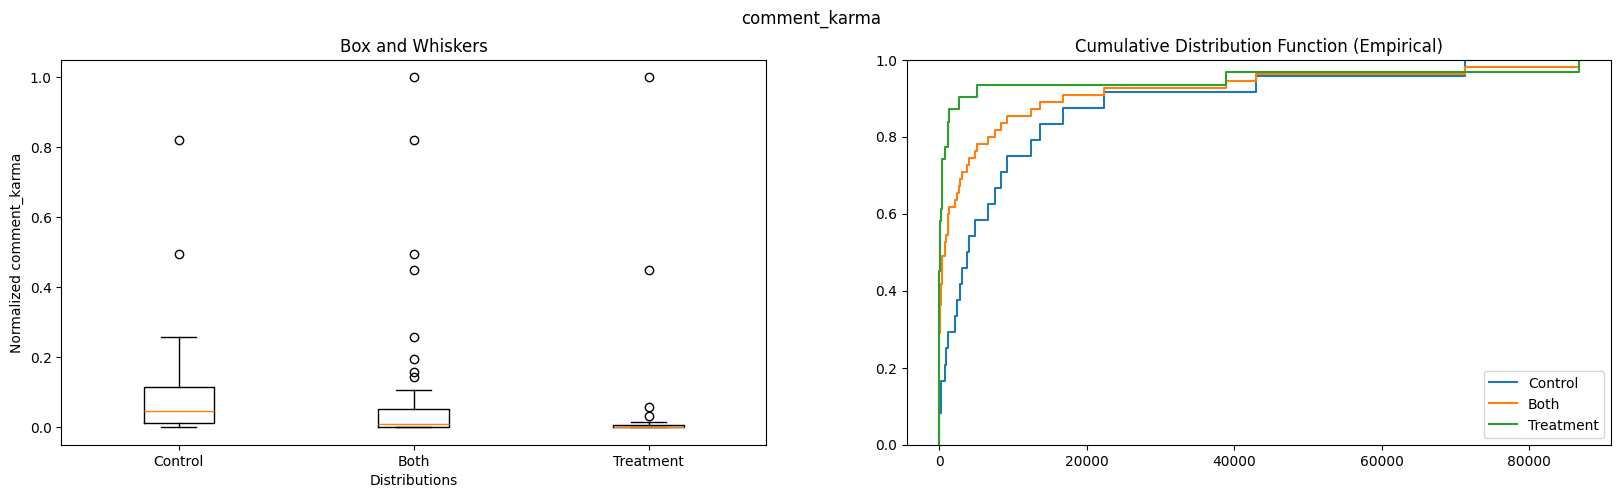

p is  3.454825004616726e-05
col is  time_creation


<Figure size 640x480 with 0 Axes>

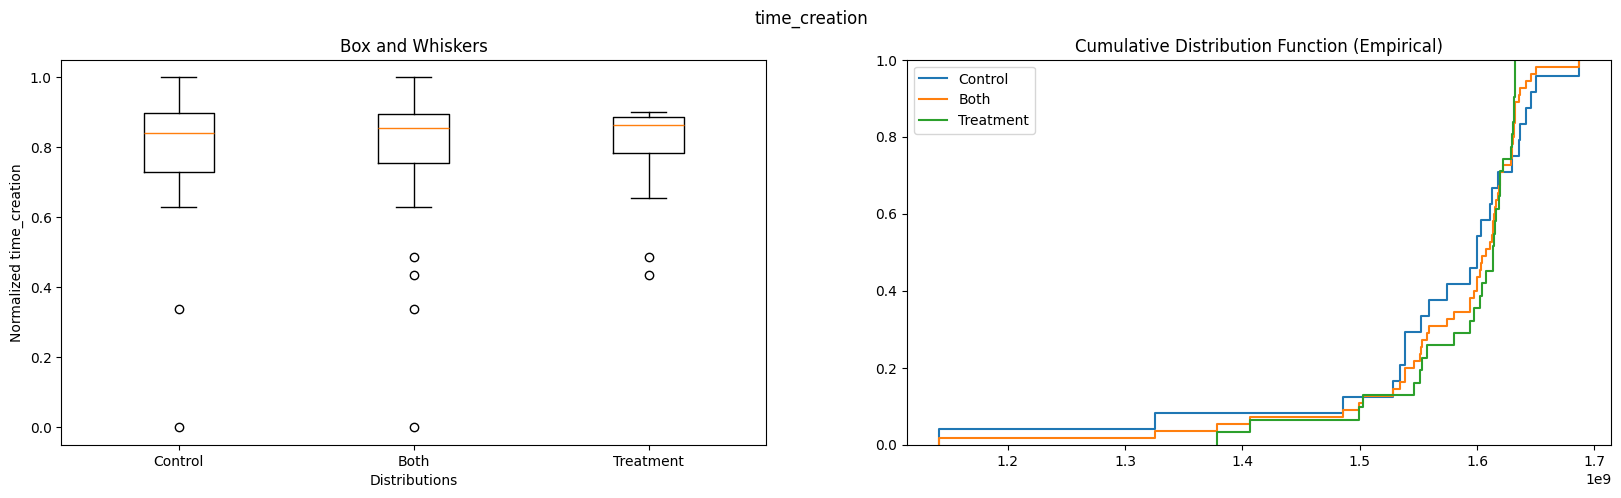

p is  0.29995323862023765
col is  verified_email
yerr is  [0.06803013430498075, 0.06803013430498075]


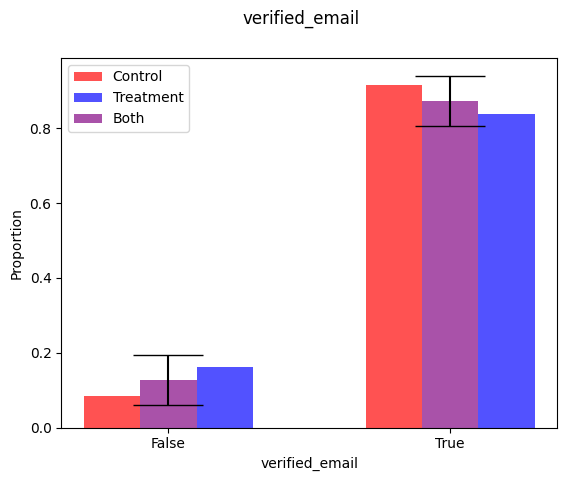

p is  0.6509789851840273
col is  is_employee
yerr is  [0.0, 0.0]


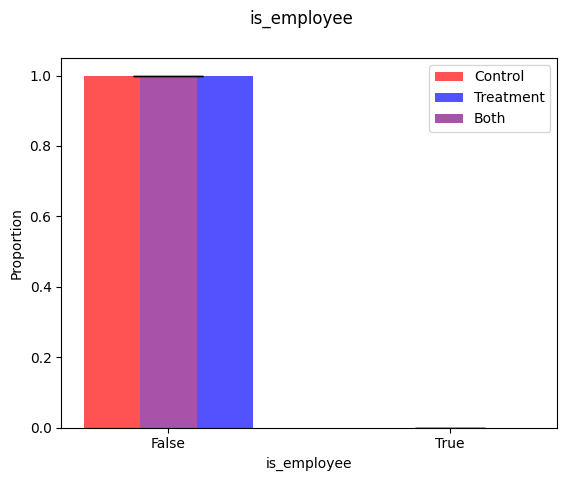

p is  1.0
col is  is_mod
yerr is  [0.06363636363636364, 0.06363636363636363]


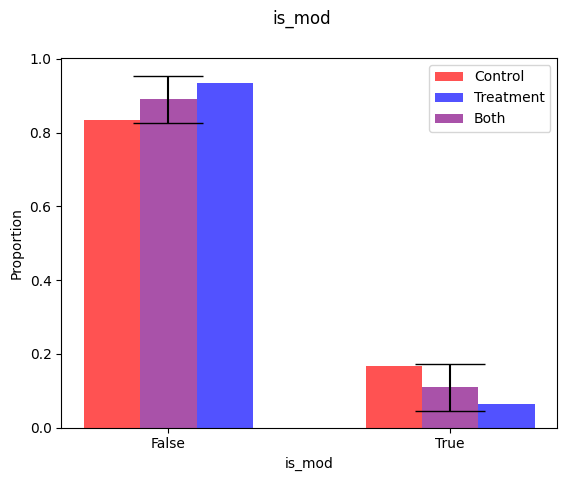

p is  0.44185482622882655
col is  is_gold
yerr is  [0.038210667311874225, 0.03821066731187422]


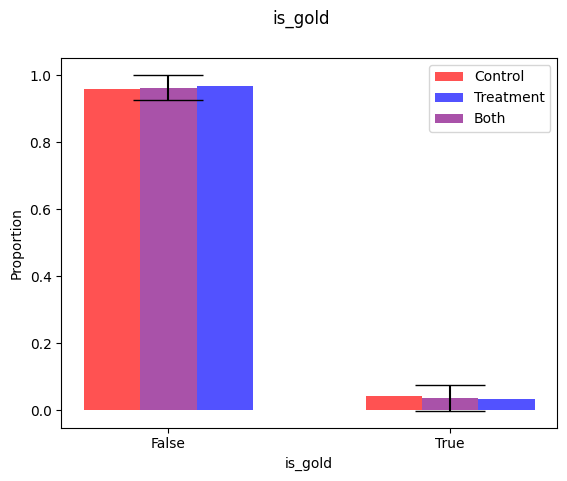

p is  1.0
col is  link_karma


<Figure size 640x480 with 0 Axes>

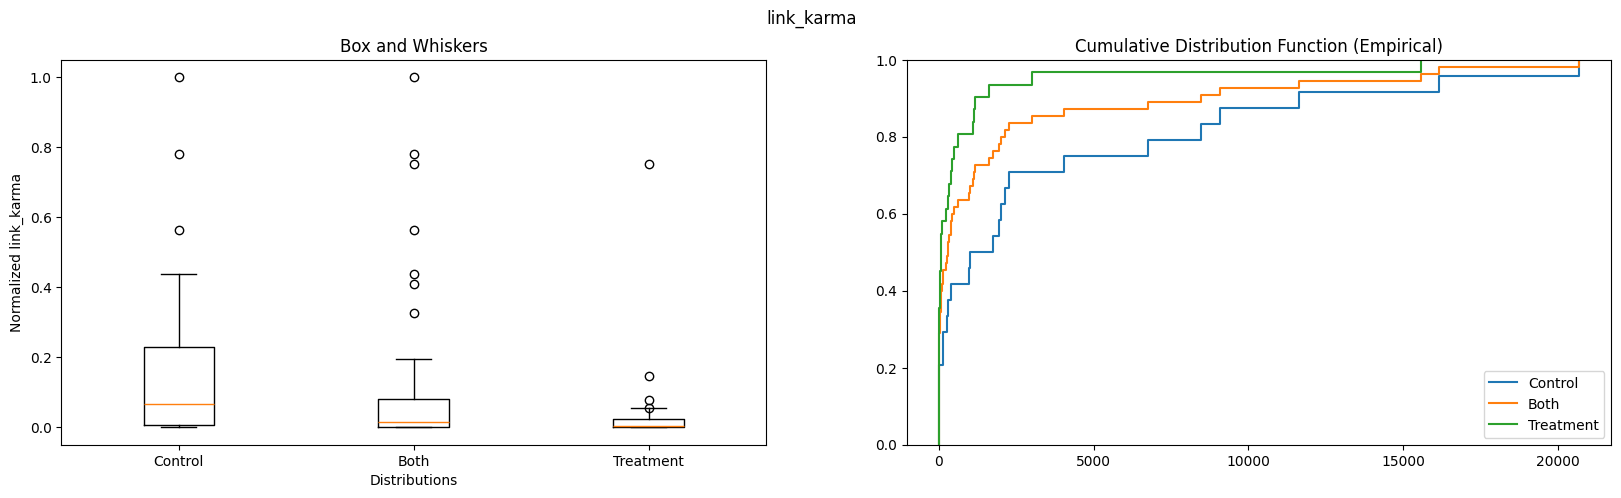

p is  0.007600076062591969
col is  num_moderated


<Figure size 640x480 with 0 Axes>

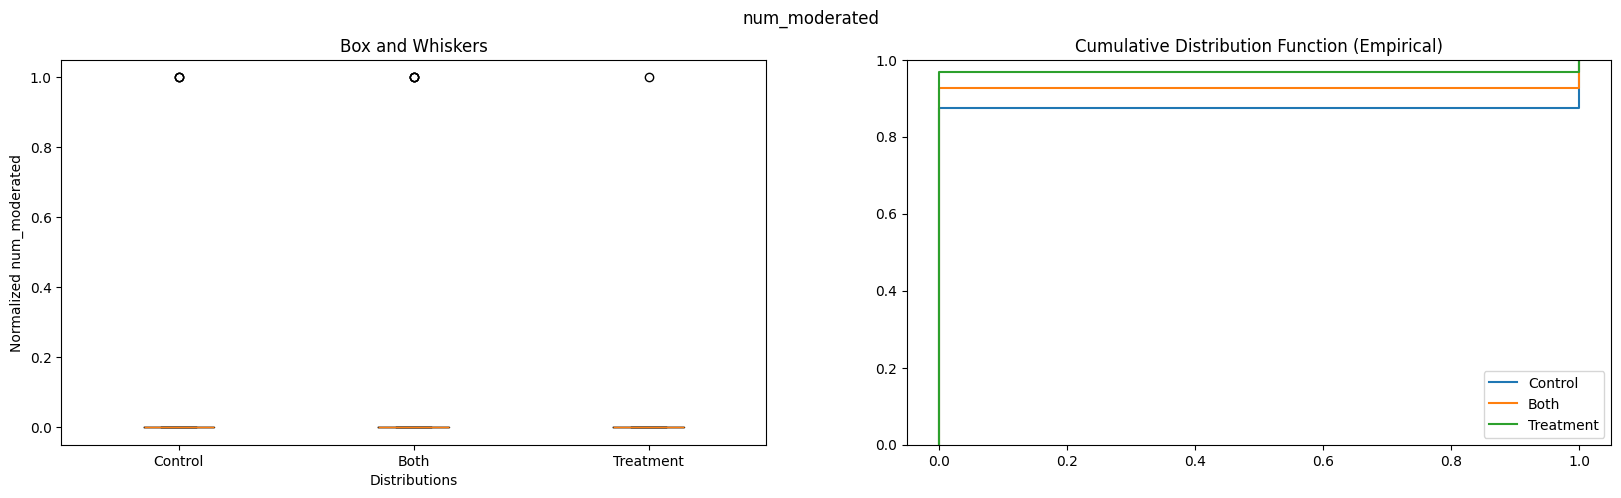

p is  0.9982531118660803
col is  num_multireddits


<Figure size 640x480 with 0 Axes>

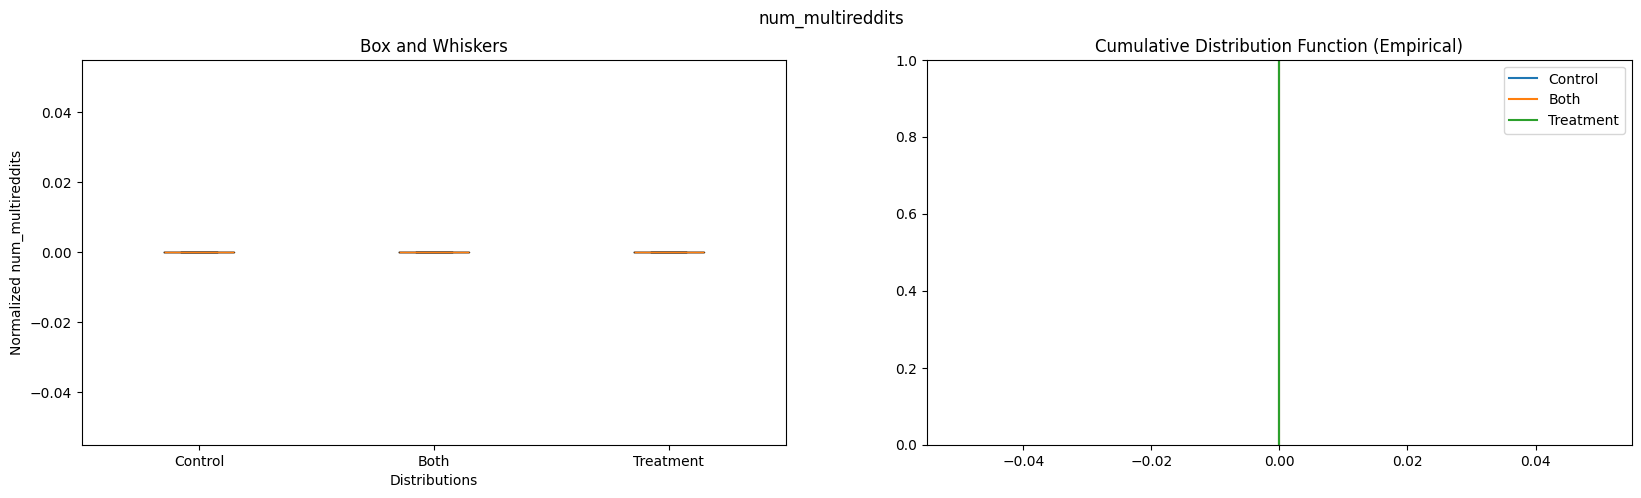

p is  1.0
col is  num_trophies


<Figure size 640x480 with 0 Axes>

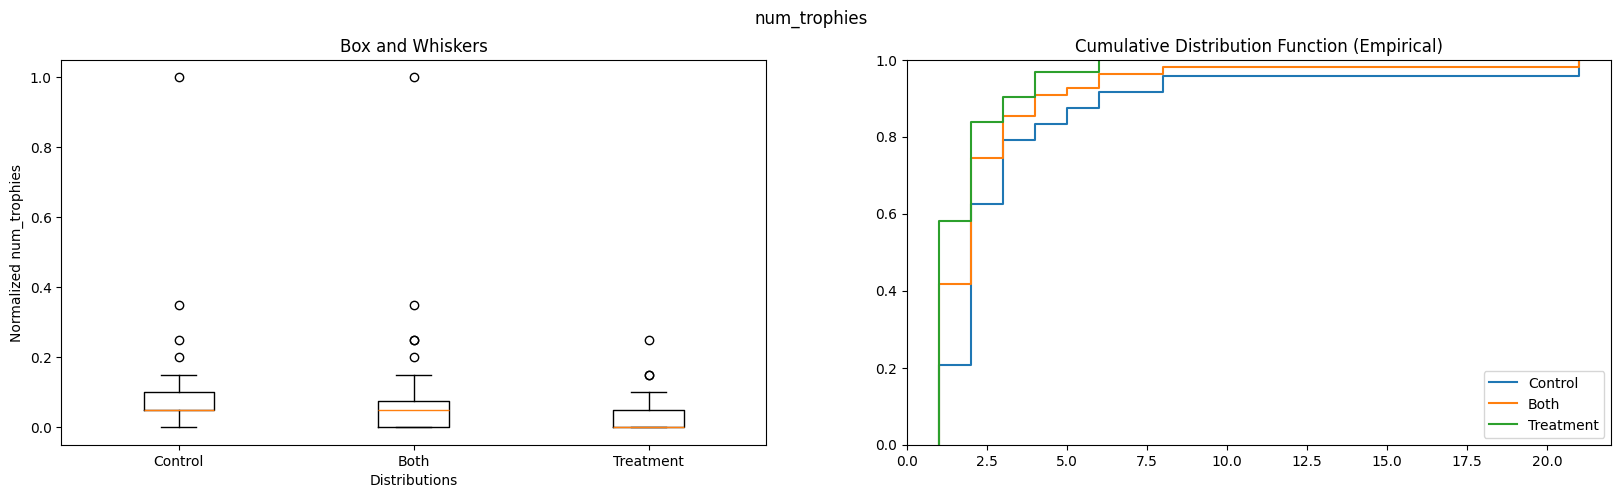

p is  0.03360425443119967
col is  has_subreddit
yerr is  [0.0, 0.0]


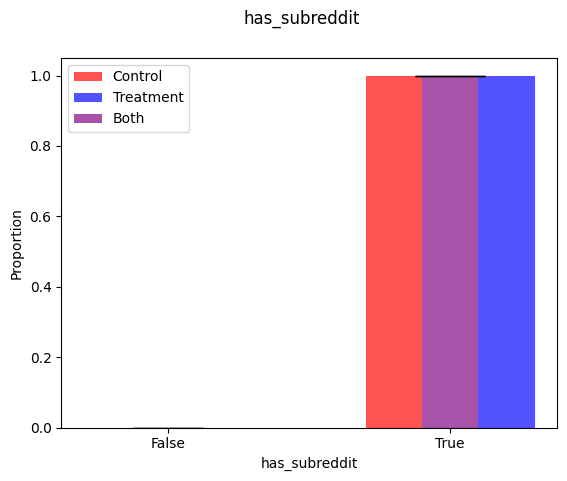

p is  1.0
col is  over_18
yerr is  [0.0816496580927726, 0.08164965809277261]


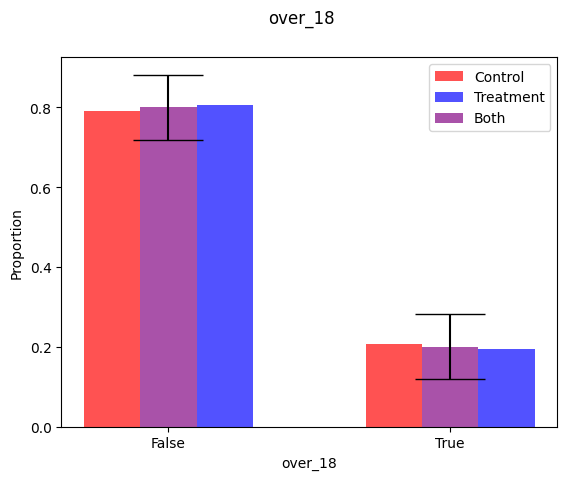

p is  1.0
col is  num_subscribers


<Figure size 640x480 with 0 Axes>

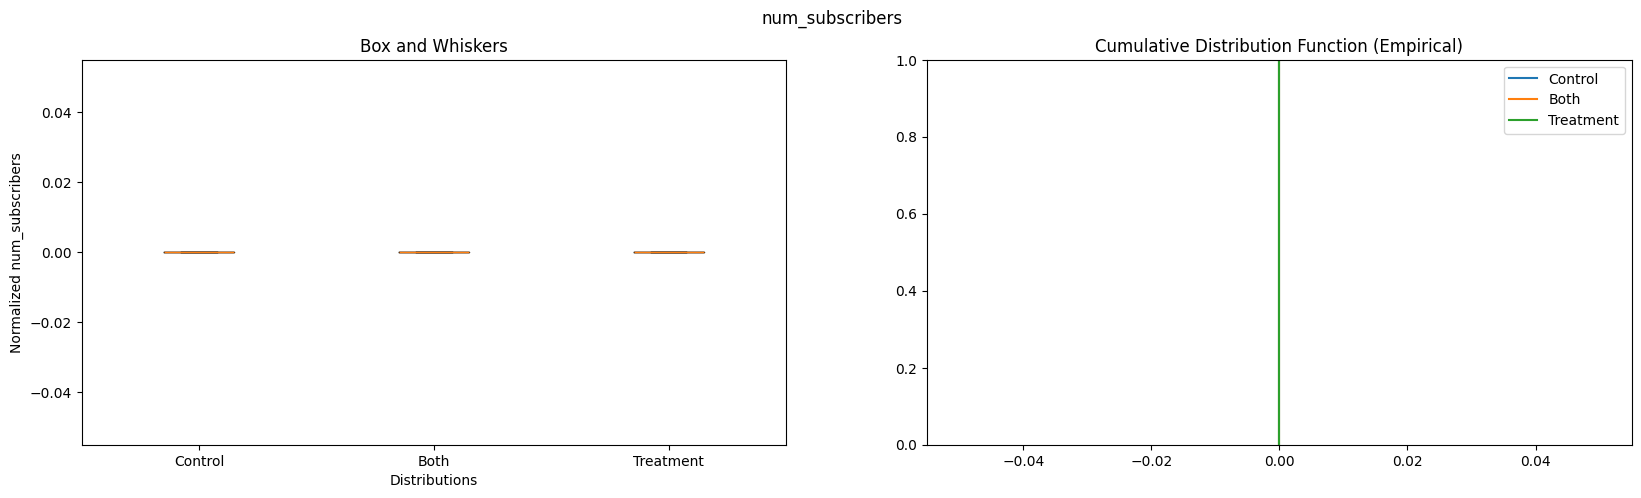

p is  1.0


In [233]:
#iterate thru all the columns

class GraphDisplayer:
    def __init__(self, l1, l2, n, visualizer, to_print): 
        self.l1 = l1 
        self.l2 = l2
        self.n = n
        self.visualizer = visualizer 
        self.to_print = to_print

    def show(self):
        print(self.to_print)
        self.visualizer(self.l1, self.l2, self.n) 
    
all_sig_diff = list()
all_not_sig_diff = list()
display_plot_by_name = dict()
for col in base_control_data.to_dict().keys():
    print("col is " ,col)
    control_vals = base_control_data[col].to_list()
    treat_vals = base_treat_data[col].to_list()

    #which function analyzes distributions to see if they are the same 
    analyzer = get_stats_continuous
    visualizer = visualize_continuous_data

    #its categorical data 
    if (Enum.is_enum(col) or isinstance(control_vals[0], type(False))):
        analyzer = get_stats_categorical
        visualizer = visualize_categorical_data
        
    

    visualizer(control_vals, treat_vals, col)

    not_bad, p_value = analyzer(control_vals, treat_vals)

    
    
    if (not_bad): all_not_sig_diff.append((p_value, col))
    else: all_sig_diff.append((p_value, col))

    display_plot_by_name[col] = GraphDisplayer(control_vals, treat_vals, col, visualizer=visualizer, to_print = "pvalue is " + str(p_value))

all_sig_diff.sort()
all_not_sig_diff.sort()

In [234]:
base_control_data.to_dict().keys()

dict_keys(['comment_karma', 'time_creation', 'verified_email', 'is_employee', 'is_mod', 'is_gold', 'link_karma', 'num_moderated', 'num_multireddits', 'num_trophies', 'has_subreddit', 'over_18', 'num_subscribers'])

In [235]:
len(all_sig_diff)

3

In [236]:
all_sig_diff

[(3.454825004616726e-05, 'comment_karma'),
 (0.007600076062591969, 'link_karma'),
 (0.03360425443119967, 'num_trophies')]

In [237]:
all_not_sig_diff

[(0.29995323862023765, 'time_creation'),
 (0.44185482622882655, 'is_mod'),
 (0.6509789851840273, 'verified_email'),
 (0.9982531118660803, 'num_moderated'),
 (1.0, 'has_subreddit'),
 (1.0, 'is_employee'),
 (1.0, 'is_gold'),
 (1.0, 'num_multireddits'),
 (1.0, 'num_subscribers'),
 (1.0, 'over_18')]

pvalue is 0.007600076062591969


<Figure size 640x480 with 0 Axes>

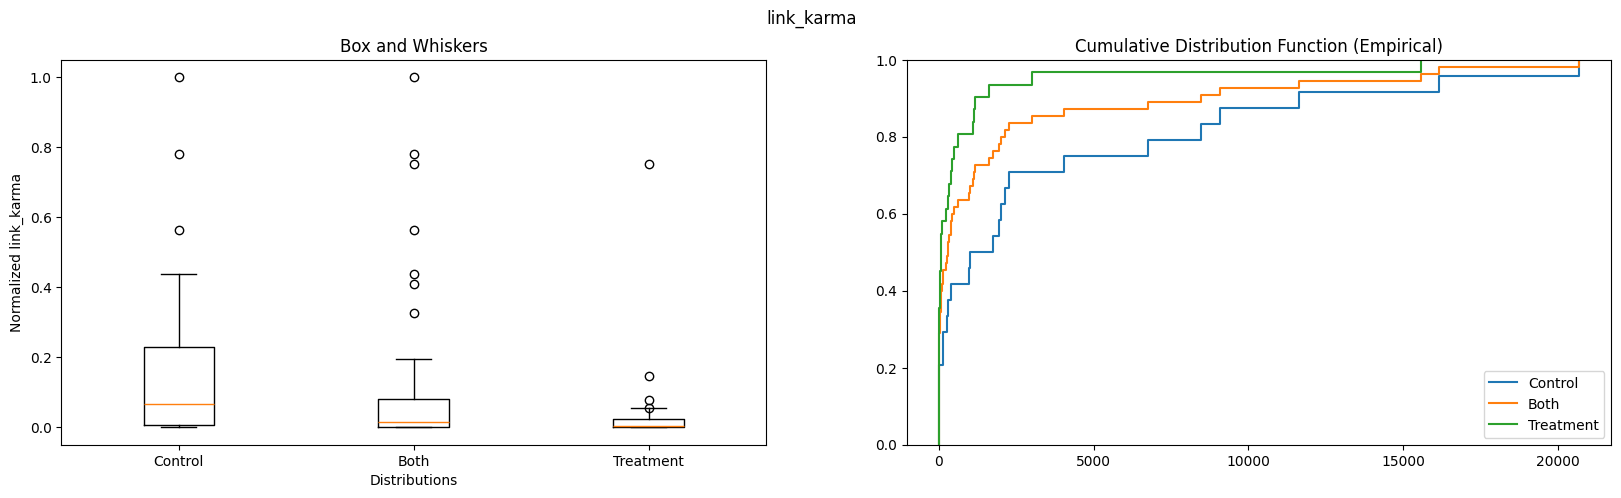

In [238]:
display_plot_by_name["link_karma"].show()

# Analyze Time Series Data

In [239]:
control_dataset[list(control_dataset.keys())[0]].keys()

dict_keys(['user_comment_data', 'valid', 'base_data'])

In [240]:
treatment_dataset.keys()

dict_keys(['MoosieGoose', 'JollyK9', 'Southern_Ad3032', 'bduwowy272habbw', 'Late_Introduction203', 'kapster68', 'TheApertureMonkey', 'talemoon22', 'sebagolindenwald', 'spicyranchplzz', 'TheFloorMayBeLava_02', 'rxtten_flesh', 'greenblooded395', 'DrakenJosh98', 'WhichUsernameIsBest', 'FStahp2', 'Pongpianskul', 'Kanashimi515', 'eviuwu', 'Kattheloner_22', 'Reeze2911', 'Sac20000', 'RanpoWasTaken', 'jlynny1811', 'Playful-Fail4778', 'GarageOk8109', 'katandcats', 'holyredemption', 'jifpeanutbutter420', 'Timely_Inflation1000', 'Erica_Peanut'])

In [241]:
# for i in range(len(treatment_dataset["MoosieGoose"]["user_comment_data"])):
#     print(treatment_dataset["MoosieGoose"]["user_comment_data"][i][0])
#     print(treatment_dataset["JollyK9"]["user_comment_data"][i][0])
#     print("\n"*3)

In [242]:
comment_control_data = {_id: data["user_comment_data"] for _id, data in control_dataset.items()}
comment_treat_data = {_id: data["user_comment_data"] for _id, data in treatment_dataset.items()}

In [243]:
comment_treat_data["RanpoWasTaken"][1]

(datetime.datetime(2021, 9, 27, 8, 27, 19),
 {'is_edited': False,
  'num_replies': 0,
  'score': 1,
  'score_is_hidden': False,
  'total_awards': 0,
  'num_ups': 1,
  'num_downs': 0,
  'is_submitter': False,
  'stickied': False,
  'title_angry': 0.0,
  'title_sad': 0.0,
  'title_worried': 0.0,
  'title_frustrated': 0.0,
  'title_anxious': 0.0,
  'title_nervous': 0.0,
  'title_disappointed': 0.0,
  'title_gloomy': 0.0,
  'title_miserable': 0.0,
  'title_longly': 0.0,
  'title_happy': 0.0,
  'title_loved': 0.0,
  'title_joyful': 0.0,
  'title_content': 0.0,
  'title_pleased': 0.0,
  'title_grateful': 0.0,
  'title_relieved': 0.0,
  'title_optimistic': 0.0,
  'title_satisfied': 0.0,
  'title_excited': 0.0,
  'body_angry': -0.0038461538461538464,
  'body_sad': 0.021794871794871794,
  'body_worried': -0.0038461538461538464,
  'body_frustrated': -0.0038461538461538464,
  'body_anxious': -0.0038461538461538464,
  'body_nervous': -0.0038461538461538464,
  'body_disappointed': -0.00384615384615

In [244]:
CONTROL_DATE = datetime(2023,11,22)
global BASE_DATA
BASE_DATA = {'is_edited': False,
  'num_replies': 0,
  'score': 1,
  'score_is_hidden': False,
  'total_awards': 0,
  'num_ups': 1,
  'num_downs': 0,
  'date': 1632749239.0,
  'is_submitter': False,
  'stickied': False,
  'title_angry': 0.0,
  'title_sad': 0.0,
  'title_worried': 0.0,
  'title_frustrated': 0.0,
  'title_anxious': 0.0,
  'title_nervous': 0.0,
  'title_disappointed': 0.0,
  'title_gloomy': 0.0,
  'title_miserable': 0.0,
  'title_longly': 0.0,
  'title_happy': 0.0,
  'title_loved': 0.0,
  'title_joyful': 0.0,
  'title_content': 0.0,
  'title_pleased': 0.0,
  'title_grateful': 0.0,
  'title_relieved': 0.0,
  'title_optimistic': 0.0,
  'title_satisfied': 0.0,
  'title_excited': 0.0,
  'body_angry': 0.0,
  'body_sad': 0.0,
  'body_worried': 0.0,
  'body_frustrated': 0.0,
  'body_anxious': 0.0,
  'body_nervous': 0.0,
  'body_disappointed': 0.0,
  'body_gloomy': 0.0,
  'body_miserable': 0.0,
  'body_longly': 0.0,
  'body_happy': 0.0,
  'body_loved': 0.0,
  'body_joyful': 0.0,
  'body_content': 0.0,
  'body_pleased': 0.0,
  'body_grateful': 0.0,
  'body_relieved': 0.0,
  'body_optimistic': 0.0,
  'body_satisfied': 0.0,
  'body_excited': 0.0}

def get_posts_before(arr: Tuple[datetime, any], date: datetime) -> Tuple[datetime, any]:
    """return all posts before a certain date in ascending order (2001->2022)"""
    assert(all(arr[i] <= arr[i+1] for i in range(len(arr) - 1)))
    for i in range(len(arr)):
        if (arr[i][0] > date):
            return arr[:i]
    return arr 

def get_posts_after(arr: Tuple[datetime, any], date: datetime)-> Tuple[datetime, any]:
    assert(all(arr[i] <= arr[i+1] for i in range(len(arr) - 1)))
    for i in range(len(arr)):
        if (arr[i][0] >= date):
            return arr[i:]
    print(arr[-1][0], "<", date)
    assert(arr[-1][0] < date)
    return []

In [245]:
import math 
import copy
from datetime import timedelta

def get_user_time_data(_key, user_arr: Tuple[datetime, any], date_of_intervention: datetime) -> Dict[str, float]:
    global BASE_DATA
    # print("key is ", _key)
    print("date is ", user_arr[-1][0])

    relevant_posts = get_posts_before(user_arr, date_of_intervention)
    print("num posts before is ", len(relevant_posts))

    return_dict = dict()

    #get by number of posts
    for num_before in [1,3,5,10,20,50,100]:
        #deep copy this guy
        my_data = pd.DataFrame.from_dict({_key: BASE_DATA}).astype(float)

        num_get = min(num_before, len(relevant_posts))
        #get most recent k posts
        these_posts = relevant_posts[-num_get:]

        #add all - this reuses work but we're not writing for efficiecny rn
        for _, post in these_posts:
            # print("post is ", post)
            this_df = pd.DataFrame.from_dict({_key : post}).astype(float)
            my_data = my_data.add(this_df)

        if (num_get): my_data = my_data/num_get #my_data = my_data.div(math.sqrt(num_get))

        # return_dict[f'{num_before}_posts_before_root_normalized'] = my_data 
        for k, v in my_data[_key].to_dict().items():

            return_dict[f'{num_before}_posts_before_{k}_root_normalized'] = v 

    
    
    #get by date of posts
    for days in [1, 3, 7, 21,84,365]:
        my_data = pd.DataFrame.from_dict({_key: BASE_DATA}).astype(float)
        
        #get all before this time 
        
        these_posts = get_posts_after(relevant_posts, date_of_intervention-timedelta(days=days))
        for post in these_posts:
            print(len(these_posts))
            print(post[0])
            print(date_of_intervention)
            print(days)
            assert(post[0] >= date_of_intervention-timedelta(days=days) )

        print("length of these posts is ", len(these_posts), "for days of", days)
        num_get = len(these_posts) 

        for _, post in these_posts:
            this_df = pd.DataFrame.from_dict({_key: post}).astype(float)
            my_data = my_data.add(this_df)

        #sqrt is for uncorrelated data I believe -> we expect these to be correlated. NOTE something inbetween might be better
        if (num_get): my_data = my_data/num_get#my_data.div(math.sqrt(num_get))

        # print("my_data is ", my_data)
        for k, v in my_data[_key].to_dict().items():
            # print("key is ", k)
            return_dict[f'{days}_days_before_{k}_root_normalized'] = v 

        return_dict[f'{days}_days_before_num_comments'] = num_get

    return return_dict


In [246]:
processed_comment_control_data = {k: get_user_time_data(k,v,CONTROL_DATE ) for k,v in comment_control_data.items()}
processed_control_comment_df = pd.DataFrame.from_dict(processed_comment_control_data).transpose()

processed_comment_treatment_data = {k: get_user_time_data(k,v,CONTROL_DATE ) for k,v in comment_treat_data.items()}
processed_treatment_comment_df = pd.DataFrame.from_dict(processed_comment_treatment_data).transpose()

processed_control_comment_df.head()

date is  2023-11-21 18:38:09
num posts before is  100
1
2023-11-21 18:38:09
2023-11-22 00:00:00
1
length of these posts is  1 for days of 1
1
2023-11-21 18:38:09
2023-11-22 00:00:00
3
length of these posts is  1 for days of 3
1
2023-11-21 18:38:09
2023-11-22 00:00:00
7
length of these posts is  1 for days of 7
2
2023-11-11 20:44:31
2023-11-22 00:00:00
21
2
2023-11-21 18:38:09
2023-11-22 00:00:00
21
length of these posts is  2 for days of 21
4
2023-09-16 01:09:47
2023-11-22 00:00:00
84
4
2023-10-23 21:37:06
2023-11-22 00:00:00
84
4
2023-11-11 20:44:31
2023-11-22 00:00:00
84
4
2023-11-21 18:38:09
2023-11-22 00:00:00
84
length of these posts is  4 for days of 84
30
2022-11-30 22:35:54
2023-11-22 00:00:00
365
30
2022-12-19 22:30:31
2023-11-22 00:00:00
365
30
2023-01-13 22:28:41
2023-11-22 00:00:00
365
30
2023-03-10 17:47:55
2023-11-22 00:00:00
365
30
2023-03-16 18:54:14
2023-11-22 00:00:00
365
30
2023-03-29 23:48:01
2023-11-22 00:00:00
365
30
2023-04-04 19:07:03
2023-11-22 00:00:00
365
30


,1_posts_before_body_angry_root_normalized,1_posts_before_body_anxious_root_normalized,1_posts_before_body_content_root_normalized,1_posts_before_body_disappointed_root_normalized,1_posts_before_body_excited_root_normalized,1_posts_before_body_frustrated_root_normalized,1_posts_before_body_gloomy_root_normalized,1_posts_before_body_grateful_root_normalized,1_posts_before_body_happy_root_normalized,1_posts_before_body_joyful_root_normalized,...,365_days_before_title_miserable_root_normalized,365_days_before_title_nervous_root_normalized,365_days_before_title_optimistic_root_normalized,365_days_before_title_pleased_root_normalized,365_days_before_title_relieved_root_normalized,365_days_before_title_sad_root_normalized,365_days_before_title_satisfied_root_normalized,365_days_before_title_worried_root_normalized,365_days_before_total_awards_root_normalized,365_days_before_num_comments
esearcher,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.000641,-0.000641,-0.000641,-0.000641,-0.000641,-0.000641,-0.000641,-0.000641,0.0,30.0
Zarrigo,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,0.300000,-0.033333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
damepipi,0.003057,0.003057,-0.005677,-0.001310,0.003057,-0.001310,-0.005677,0.003057,0.016157,-0.005677,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,5.0
-stayHard-,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.000302,-0.000302,-0.000302,-0.000302,-0.000302,0.001714,-0.000302,-0.000302,0.0,31.0
BIueBaru,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0


In [255]:
processed_treatment_comment_df.to_dict().keys()

dict_keys(['1_posts_before_body_angry_root_normalized', '1_posts_before_body_anxious_root_normalized', '1_posts_before_body_content_root_normalized', '1_posts_before_body_disappointed_root_normalized', '1_posts_before_body_excited_root_normalized', '1_posts_before_body_frustrated_root_normalized', '1_posts_before_body_gloomy_root_normalized', '1_posts_before_body_grateful_root_normalized', '1_posts_before_body_happy_root_normalized', '1_posts_before_body_joyful_root_normalized', '1_posts_before_body_longly_root_normalized', '1_posts_before_body_loved_root_normalized', '1_posts_before_body_miserable_root_normalized', '1_posts_before_body_nervous_root_normalized', '1_posts_before_body_optimistic_root_normalized', '1_posts_before_body_pleased_root_normalized', '1_posts_before_body_relieved_root_normalized', '1_posts_before_body_sad_root_normalized', '1_posts_before_body_satisfied_root_normalized', '1_posts_before_body_worried_root_normalized', '1_posts_before_date_root_normalized', '1_pos

In [256]:
all_not_sig_diff_base = copy.deepcopy(all_not_sig_diff)
all_sig_diff_base = copy.deepcopy(all_sig_diff)

In [257]:
print(len(all_not_sig_diff_base))
print(len(all_sig_diff_base))
print(f'we would expected 5% difference - difference is {len(all_sig_diff_base)/(len(all_sig_diff_base+all_not_sig_diff_base))}')

570
99
we would expected 5% difference - difference is 0.14798206278026907


In [258]:
#for loop copied frmo above

all_sig_diff = copy.deepcopy(all_sig_diff_base)
all_not_sig_diff = copy.deepcopy(all_not_sig_diff_base)
for col in processed_treatment_comment_df.to_dict().keys():
    print("col is " ,col)
    control_vals = processed_control_comment_df[col].to_list()
    treat_vals = processed_treatment_comment_df[col].to_list()

    #which function analyzes distributions to see if they are the same 
    analyzer = get_stats_continuous
    visualizer = visualize_continuous_data

    #its categorical data 
    if (Enum.is_enum(col) or isinstance(control_vals[0], type(False))):
        analyzer = get_stats_categorical
        visualizer = visualize_categorical_data
        
    

    # visualizer(control_vals, treat_vals, col)

    not_bad, p_value = analyzer(control_vals, treat_vals)

    
    
    if (not_bad): all_not_sig_diff.append((p_value, col))
    else: all_sig_diff.append((p_value, col))

    display_plot_by_name[col] = GraphDisplayer(control_vals, treat_vals, col, visualizer=visualizer, to_print = f'pvalue is {p_value}')

all_sig_diff.sort()
all_not_sig_diff.sort()

col is  1_posts_before_body_angry_root_normalized
p is  0.9473046989804916
col is  1_posts_before_body_anxious_root_normalized
p is  0.4451815216064052
col is  1_posts_before_body_content_root_normalized
p is  0.5000910371919511
col is  1_posts_before_body_disappointed_root_normalized
p is  0.8296247394338546
col is  1_posts_before_body_excited_root_normalized
p is  0.6358831188491504
col is  1_posts_before_body_frustrated_root_normalized
p is  0.4451815216064052
col is  1_posts_before_body_gloomy_root_normalized
p is  0.5000910371919511
col is  1_posts_before_body_grateful_root_normalized
p is  0.8296247394338546
col is  1_posts_before_body_happy_root_normalized
p is  0.9998678243404615
col is  1_posts_before_body_joyful_root_normalized
p is  0.5000910371919511
col is  1_posts_before_body_longly_root_normalized
p is  0.5000910371919511
col is  1_posts_before_body_loved_root_normalized
p is  0.4688916378177086
col is  1_posts_before_body_miserable_root_normalized
p is  0.94730469898049

In [259]:
bad = len(all_sig_diff)
good = len(all_not_sig_diff)
print(bad/(bad + good), "- if these are the same we would expect these to be about 5%")
print(bad+good)

0.1471698113207547 - if these are the same we would expect these to be about 5%
1325


In [260]:
key_to_num_bad = dict()
key_to_num = dict()

def get_category(v):
    return ''.join((c for c in v.replace("_normalized", "").replace("_days_before_","").replace("_posts_before_","").replace("_root","").replace("body", "").replace("title","").replace("_","") if not c.isdigit()))
for k,v in all_sig_diff:
    # print(v)
    _key = get_category(v)
    key_to_num_bad[_key] = key_to_num_bad.get(_key,0) + 1
    key_to_num[_key] = key_to_num.get(_key,0) + 1

for k,v in all_not_sig_diff:
    # print(v)
    _key = get_category(v)
    key_to_num[_key] = key_to_num.get(_key,0) + 1

proprotion_good_to_name = list()
for k,v in key_to_num.items():
    proprotion_good_to_name.append(( (v-key_to_num_bad.get(k,0))/v, k))

proprotion_good_to_name.sort() 
for prop_good, name in proprotion_good_to_name:
    # if (prop_good ==1): break
    print(f'proprtion good is {prop_good} for {name}')

proprtion good is 0.0 for commentkarma
proprtion good is 0.0 for linkkarma
proprtion good is 0.0 for numtrophies
proprtion good is 0.38461538461538464 for numups
proprtion good is 0.38461538461538464 for score
proprtion good is 0.7307692307692307 for joyful
proprtion good is 0.7307692307692307 for worried
proprtion good is 0.7692307692307693 for anxious
proprtion good is 0.7692307692307693 for gloomy
proprtion good is 0.7692307692307693 for longly
proprtion good is 0.7692307692307693 for optimistic
proprtion good is 0.7692307692307693 for relieved
proprtion good is 0.7692307692307693 for sad
proprtion good is 0.8076923076923077 for content
proprtion good is 0.8333333333333334 for numcomments
proprtion good is 0.8461538461538461 for frustrated
proprtion good is 0.8461538461538461 for loved
proprtion good is 0.8461538461538461 for satisfied
proprtion good is 0.8846153846153846 for nervous
proprtion good is 0.9230769230769231 for disappointed
proprtion good is 0.9230769230769231 for pleas

In [253]:
print("\n".join([i[1].replace("_normalized", "").replace("_days_before_","_d_").replace("_posts_before_","_p_").replace("_root","") + "\t\t\t" + str(i[0])for i in all_sig_diff]))

10_p_body_sad			2.3730166963366792e-07
20_p_body_sad			1.0698890090678977e-06
10_p_num_ups			2.4653023343943092e-06
10_p_score			2.4653023343943092e-06
1_p_num_ups			2.4653023343943092e-06
1_p_score			2.4653023343943092e-06
50_p_body_sad			6.617846199185908e-06
100_p_num_ups			1.9551254109708115e-05
100_p_score			1.9551254109708115e-05
5_p_body_sad			2.451657791415435e-05
5_p_num_ups			3.454825004616726e-05
5_p_score			3.454825004616726e-05
comment_karma			3.454825004616726e-05
20_p_num_ups			6.757993485883703e-05
20_p_score			6.757993485883703e-05
3_p_body_sad			6.757993485883703e-05
3_p_num_ups			0.00011247642837023072
3_p_score			0.00011247642837023072
50_p_num_ups			0.00012934380188013738
50_p_score			0.00012934380188013738
5_p_body_joyful			0.00015612710134904552
100_p_body_sad			0.0002131768420794956
20_p_body_content			0.00033717605632198685
5_p_body_content			0.000497015972657949
5_p_body_gloomy			0.000497015972657949
5_p_body_longly			0.000497015972657949
5_p_body_relieved			0

pvalue is 2.3730166963366792e-07


<Figure size 640x480 with 0 Axes>

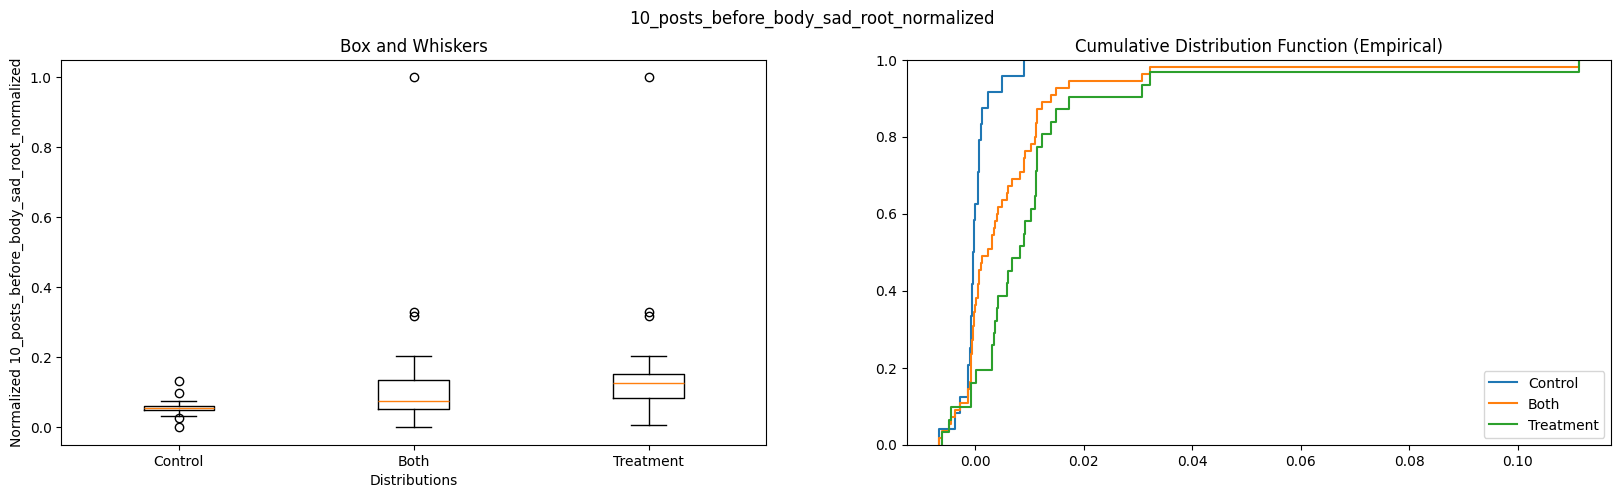

pvalue is 1.0698890090678977e-06


<Figure size 640x480 with 0 Axes>

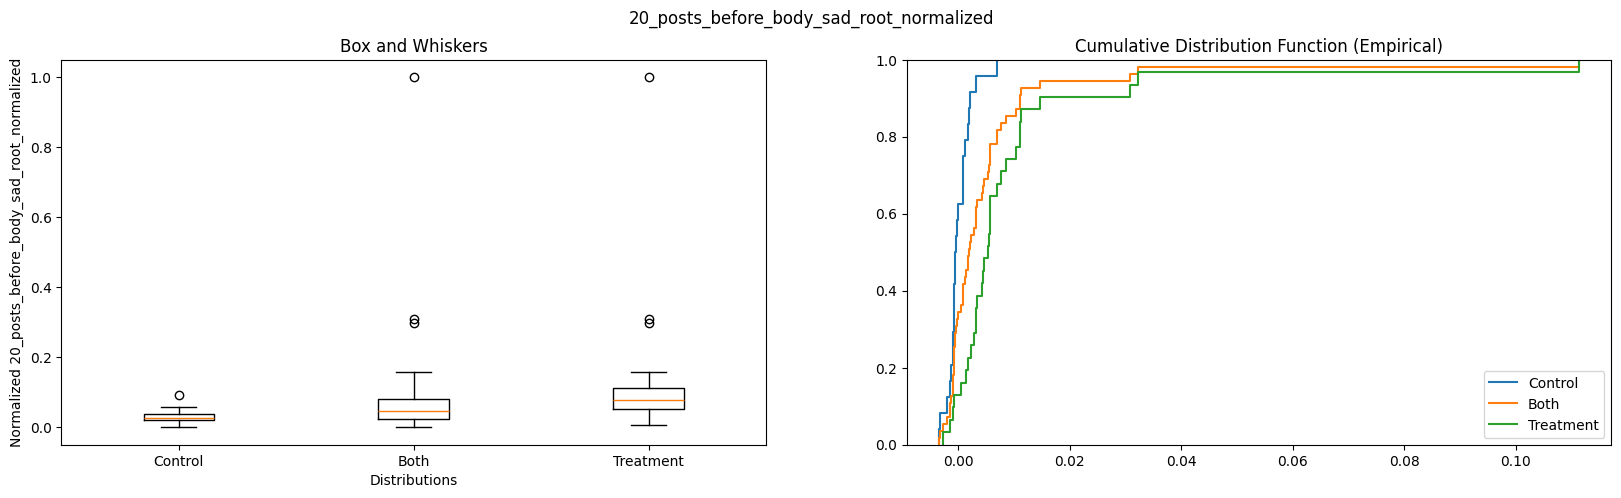

pvalue is 6.617846199185908e-06


<Figure size 640x480 with 0 Axes>

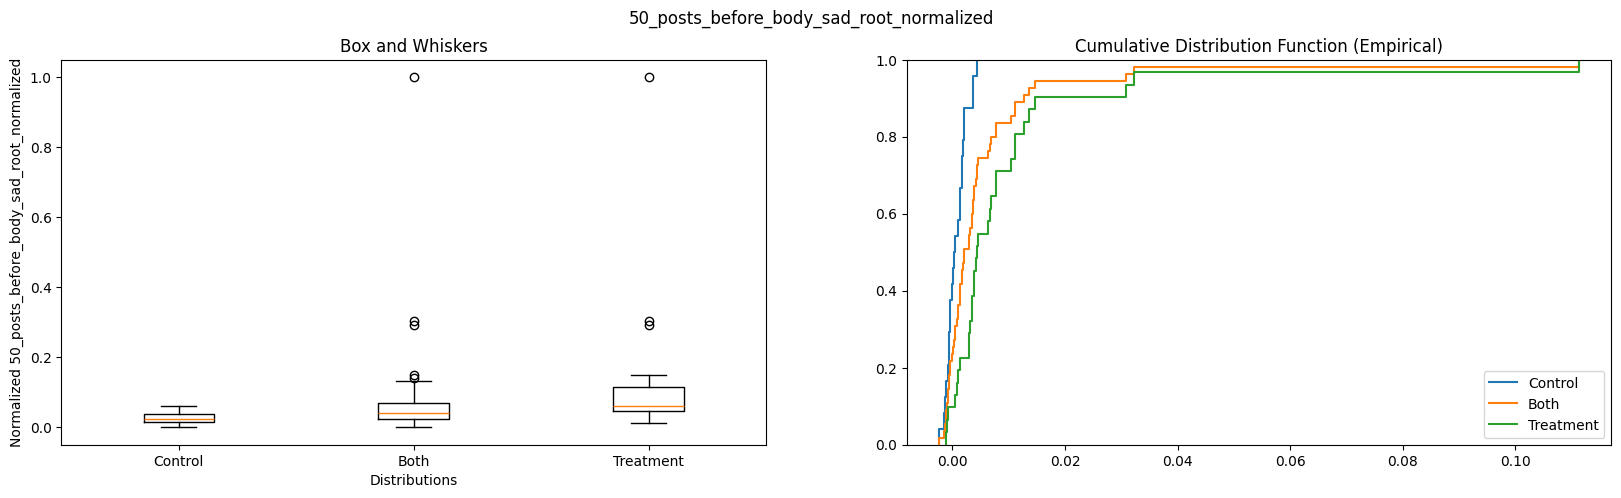

pvalue is 2.451657791415435e-05


<Figure size 640x480 with 0 Axes>

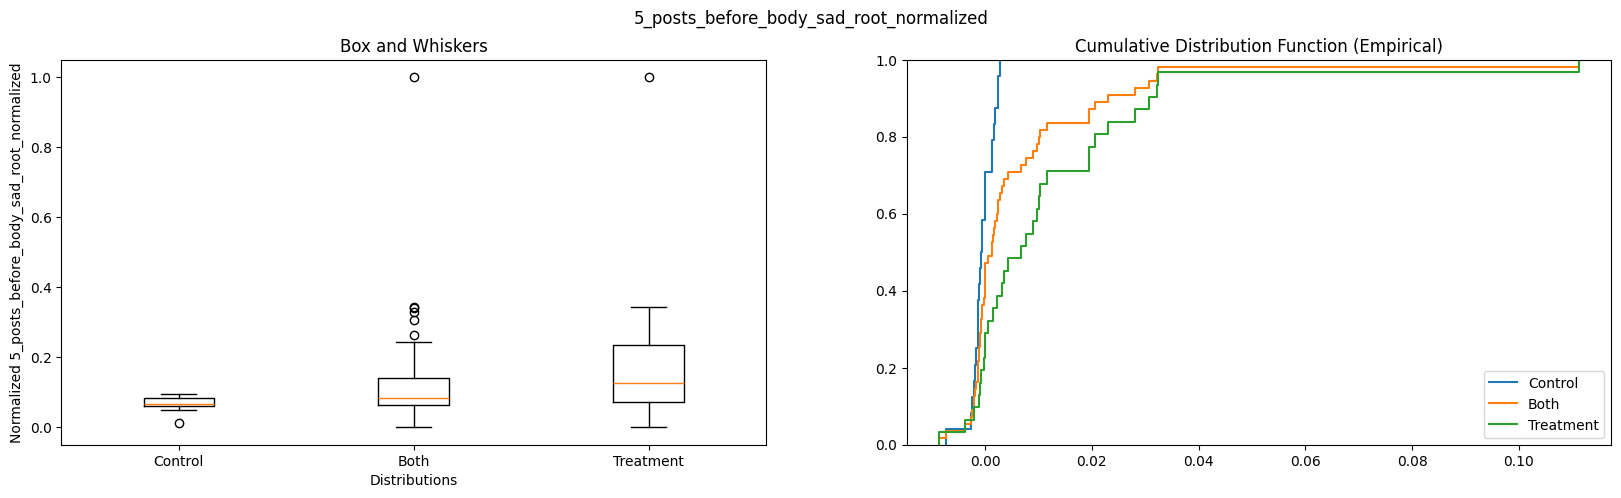

pvalue is 6.757993485883703e-05


<Figure size 640x480 with 0 Axes>

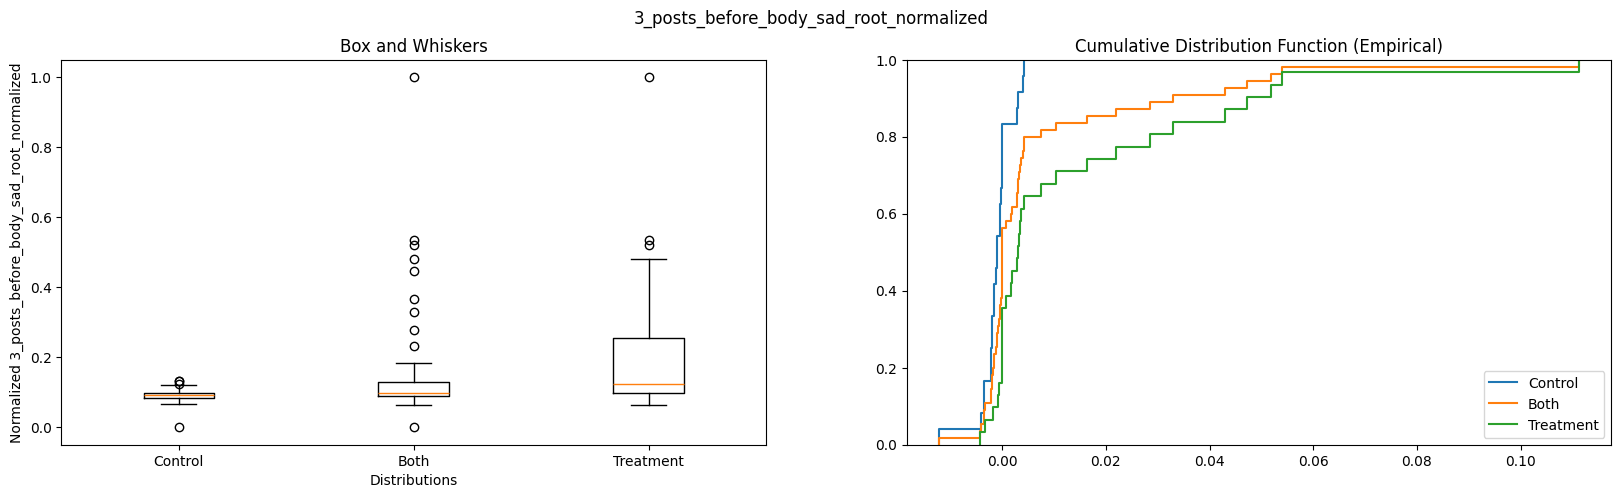

pvalue is 0.0002131768420794956


<Figure size 640x480 with 0 Axes>

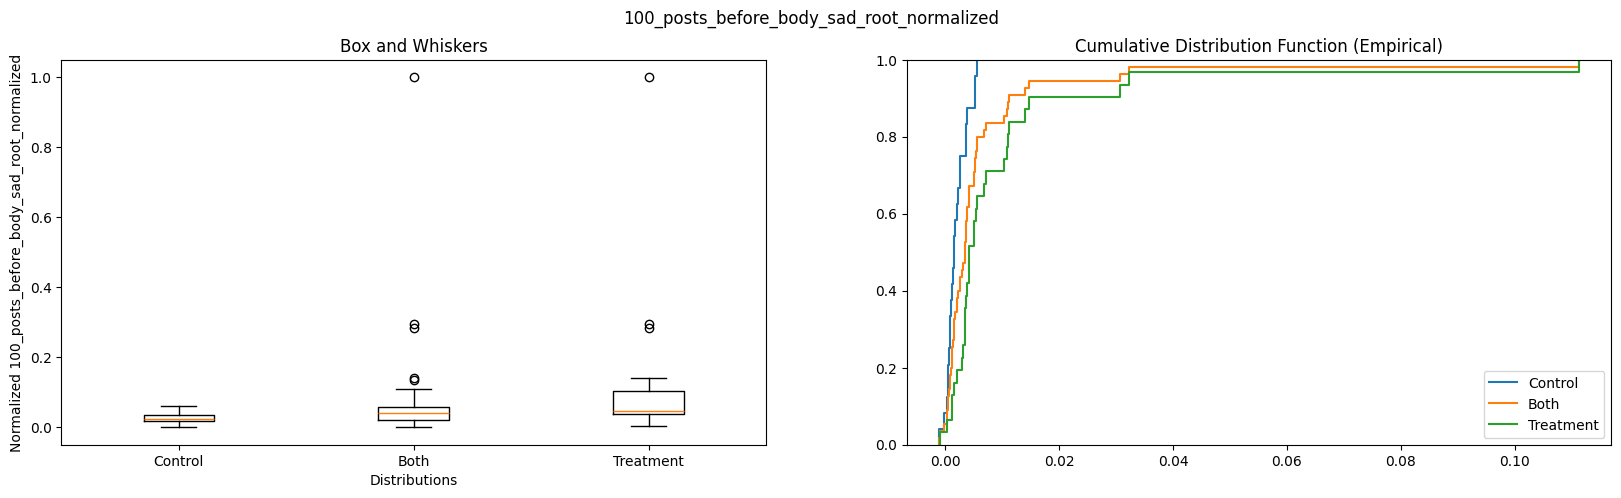

In [254]:
# miserables = """1_days_before_body_miserable_root_normalized
# 1_posts_before_body_miserable_root_normalized
# 21_days_before_body_miserable_root_normalized
# 365_days_before_body_miserable_root_normalized
# 3_days_before_body_miserable_root_normalized
# 3_posts_before_body_miserable_root_normalized
# 7_days_before_body_miserable_root_normalized
# 84_days_before_body_miserable_root_normalized""".split("\n")
for _, name in all_sig_diff:#miserables:
    if ("sad" in name):
        display_plot_by_name[name].show()